<img src='bit_hd.jpg' />

## <span style="color:blue"> DEFINATION </span>: classification of currency(Bill) is authenticate or not using Random Forest classification algorithm.
## <span style="color:blue">Prepared By</span>:     PRATIK VASAVA

## Random Forest Algorithms:
     
     Random forest, like its name implies, consists of a large number of individual decision trees that operate as an            
     ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes          
     becomes our model’s prediction
     
     A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the                
     individual constituent models.

### Prerequisites Python libraries
#### Pandas(https://pandas.pydata.org/getpandas.html) =Library for data data manipulation and analysis.
#### Matplolib(https://matplotlib.org/)=Library for to performe mathamtical oprations.
#### numpy(http://www.numpy.org/)=Library  NumPy is a general-purpose array-processing package. 


## Importing Libraries

In [46]:

#Loadindg all necessary python libraries.python version(v3.7).
#data manipulation and analysis
import pandas as pd
#scientific computing 
import numpy as np
#visulatition 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from pylib.plot import plot_decision_boundary

In [47]:
#CREATING VARIBLE FOR  FILE
file='banknote-authentication_csv.csv'

## Loading Dataset

In [48]:
#reading file using pandas
data=pd.read_csv(file)

In [49]:
#viewing first five entries.
data.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


## Data Feature Explanation.

      - V1.    variance of Wavelet Transformed image (continuous)

      - V2.    skewness of Wavelet Transformed image (continuous)

      - V3.    curtosis of Wavelet Transformed image (continuous)
 
      - V4.    entropy of image (continuous)
     
     - CLASS   Bill is authenticate or not?(Target Variable)

In [50]:
#checking total rows and columns.
data.shape

(1372, 5)

In [51]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
V1       1372 non-null float64
V2       1372 non-null float64
V3       1372 non-null float64
V4       1372 non-null float64
Class    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### Lets explore data to find Basic statastical information. 

     count:         total count of entry,
     mean           mean of all data.
     Std:           standars daviation of variable, 
     min:           minimum value 
     max:           Maximum value.
     data spread at different Inter Quantail range(IQR):Like 25%,50%,75%.


In [52]:
#showing basic statstics of dataset
data.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [53]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

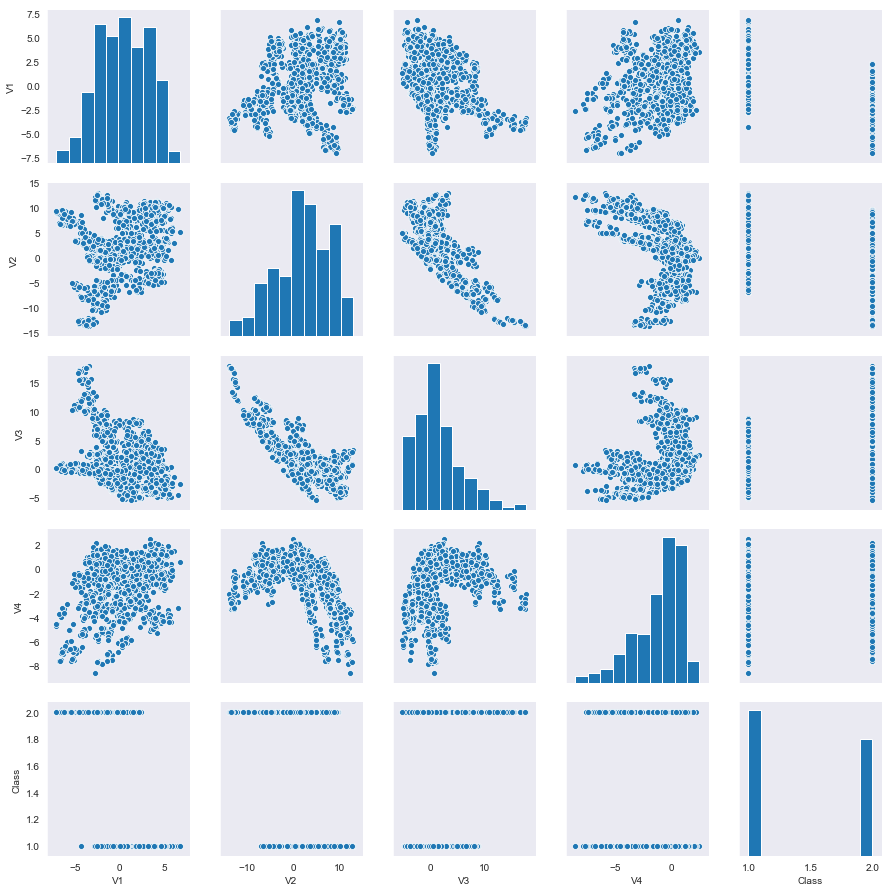

In [54]:
sns.pairplot(data)

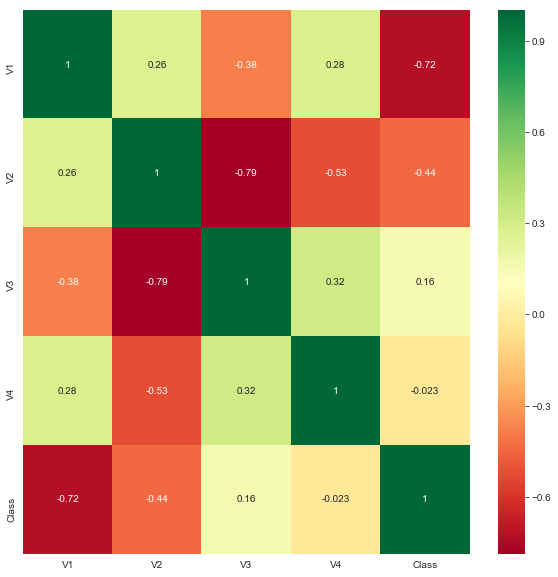

In [55]:
coral = data.corr()
top_corr_features = coral.index
plt.figure(figsize=(10,10))
#plot heat map
#sns.heatmap(data[top_corr_features].corr(), vmin=0, vmax=1)
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

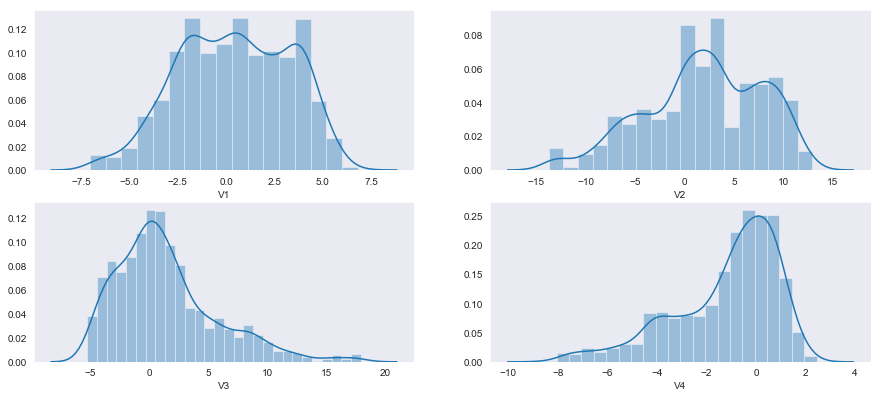

In [56]:
col=data.columns
fig=plt.figure(figsize=(15,10))
i=0
x=len(data.columns)
#print(x)
for i in range(x-1):
    #print(i)
    i=i
    #b=int(x+1)
    #print(b)
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(3,2,i+1)
    sns.distplot(data[z])
    #plt.title(dataset[z])
plt.show()

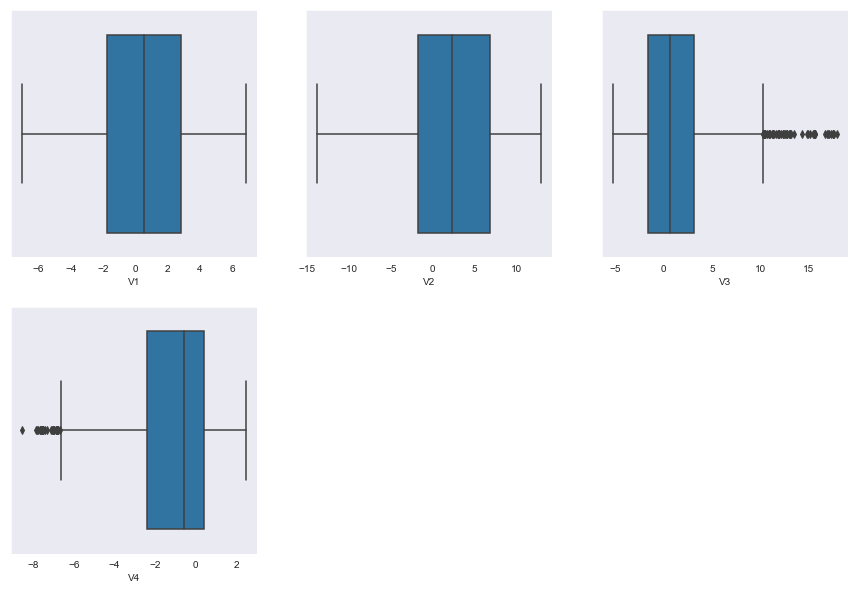

In [57]:
col=data.columns
fig=plt.figure(figsize=(15,10))
i=0
x=len(data.columns)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(2,3,i+1)
    sns.boxplot(data[z])
    #plt.title(dataset[z])
plt.show()

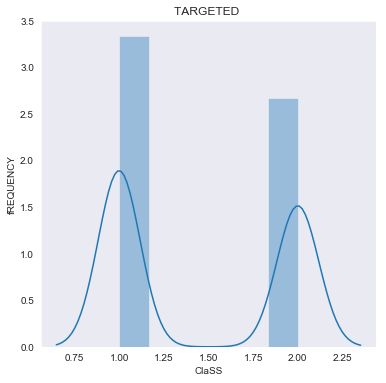

In [58]:
plt.figure(figsize=(6,6))
sns.distplot(data['Class'])
plt.title('TARGETED ')
plt.xlabel('ClaSS')
plt.ylabel('fREQUENCY')
plt.show()

In [59]:
dataset=data.copy()

In [60]:
Q1 = dataset.quantile(0.25)
Q3 =dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

V1       4.594475
V2       8.522825
V3       4.754225
V4       2.808260
Class    1.000000
dtype: float64


In [61]:
(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

,V1,V2,V3,V4,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [62]:

dataset=dataset[~((dataset< (Q1 - 1.5 * IQR)) |(dataset> (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(1280, 5)

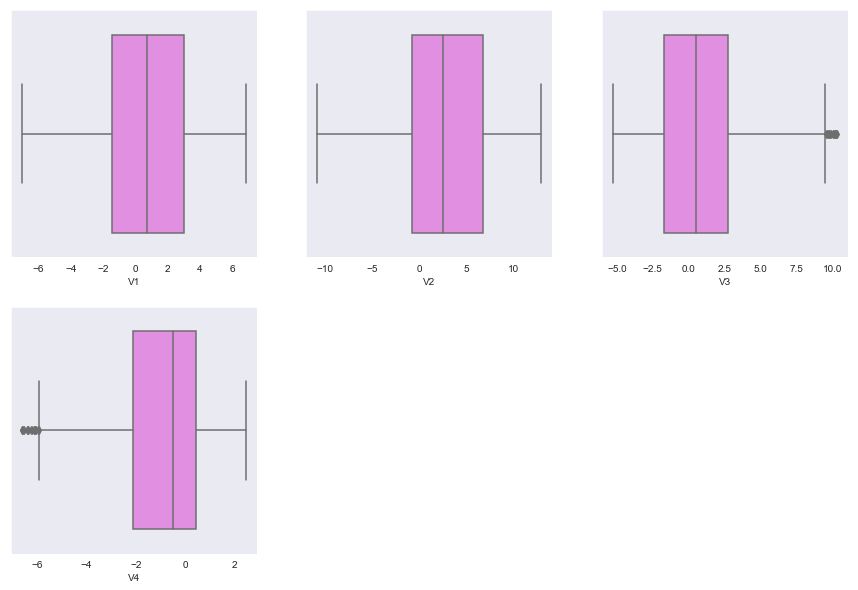

In [63]:
col=dataset.columns
fig=plt.figure(figsize=(15,10))
i=0
x=len(dataset.columns)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(2,3,i+1)
    sns.boxplot(dataset[z],color='violet')
    #plt.title(dataset[z])
   
    
        
plt.show()

In [64]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss=StandardScaler()

In [67]:
data_scal=dataset

In [68]:
ss.fit(data_scal)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
data_scal=ss.transform(data_scal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [70]:
dataset= pd.DataFrame(data_scal,index=dataset.index,columns=data.columns)
#scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [71]:
dataset.head()

,V1,V2,V3,V4,Class
0,1.078830,1.203411,-1.037471,0.300102,-0.848782
1,1.423723,1.109521,-0.939924,-0.229093,-0.848782
2,1.170026,-0.924867,0.286139,0.588621,-0.848782
3,1.017262,1.364702,-1.374255,-1.340700,-0.848782
4,-0.149680,-1.266935,1.026790,0.017647,-0.848782


In [72]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
X.head()

,V1,V2,V3,V4
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [74]:
print(model.feature_importances_)

[0.54803223 0.22817155 0.17443867 0.04935754]


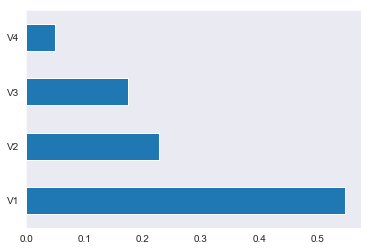

In [75]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()



## Model Selection

### Train_Test_split

In [76]:
x1=data[['V1','V2','V3']].values
y1=data['Class'].values

In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(x1,y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
y_Pred = rfc.predict(x_test)

In [ ]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_Pred)

Text(0.5, 257.44, 'Predicted label')

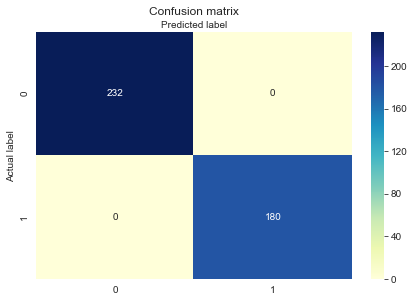

In [ ]:
#confusion matrix
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
print("Accuracy Score:",metrics.accuracy_score(y_test,y_Pred))
print("Precision:",metrics.precision_score(y_test, y_Pred))
print("Recall:",metrics.recall_score(y_test, y_Pred))

In [ ]:
print(metrics.classification_report(y_test,y_Pred))

In [ ]:
asd=pd.DataFrame({'Actual':y_test,'predicted':y_Pred})

In [ ]:
asd.head()

In [ ]:
plt.figure(figsize=(7,7))
col=['skyblue']
asd.hist(color=col)